# Clustering
#### Clustering: KNN
#### Goal: Implement and try KNN
#### Steps: Create clusters with scikit-learn (make_blobs function), perform KNN clustering on tehse, determine a good value for k and explain your choice

In [64]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np

df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

column1 = df['cement'].values
column2 = df['csMPa'].values
data = np.column_stack((column1, column2))


# create k-nearest neighbors object
k = 9
knn = NearestNeighbors(n_neighbors=k)

# fit the data to the k-nearest neighbors object
knn.fit(data)

# get the indices and distances of the k-nearest neighbors of each data point
distances, indices = knn.kneighbors(data)

# print the indices and distances of the k-nearest neighbors of the first data point
print(indices[0])
print(distances[0])


[  0 756 755 754 753   1 828 820 752]
[ 0.          5.82        8.37       10.33       12.68       18.1
 18.68154169 19.77104954 20.23      ]


In [63]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# read the dataset
df = pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

# select the columns for the features and target variable
X = df[['cement']]
y = df['csMPa']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a k-NN regressor with k=10
k = 9
knn = KNeighborsRegressor(n_neighbors=k)

# fit the regressor to the training data
knn.fit(X_train, y_train)

# predict the target variable of the testing data
y_pred = knn.predict(X_test)

# compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# compute the accuracy of the regressor
accuracy = 1 - (mse / np.var(y_test))

# print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.2652366950880033


I tested several different k values, and k=9 gave me the best accuracy. This accuracy is really bad though, so the code still needs to be adjusted.


# Perform PCA on "Concrete" Dataset

In [39]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')
target = df.csMPa.values

In [40]:
del df['csMPa']

In [41]:
X = df.values
X.shape

(1030, 8)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [43]:
from sklearn.decomposition import PCA # within the scikit-learn module which focuses on
                                      # Machine Learning in Python, we import PCA decomposition algorithm
pca8 = PCA(n_components=8)            # applies PCA with the argument that we want a two-component fit
pca8.fit(X_scaled)                           # fits the PCA model with dataset X defined above
print(pca8)                          # this is only the PCA object!
X_pca8 = pca8.transform(X_scaled)

# The fit learns some quantities from the data, namely the "components" and "explained variance"
# In this example, there are two sets of components to be described below

print('components: ' + str(pca8.components_))                 # each component defined by x-y pair
print('explained variance: ' + str(pca8.explained_variance_)) # how much variance each component explains 
                                                              # taking into consideration the entire dataset
print('cummulative explained variance: ' + str(round(sum(pca8.explained_variance_),3)))
print('ratio: ', sum(pca8.explained_variance_ratio_ * 100))

PCA(n_components=8)
components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]
explained variance: [2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]
cummulative explained variance: 8.008
ratio:  100

In [44]:
np.cumsum(pca8.explained_variance_ratio_ * 100)

array([ 28.50124202,  46.20217702,  62.95316494,  75.6301508 ,
        87.52400072,  97.40144413,  99.62446526, 100.        ])

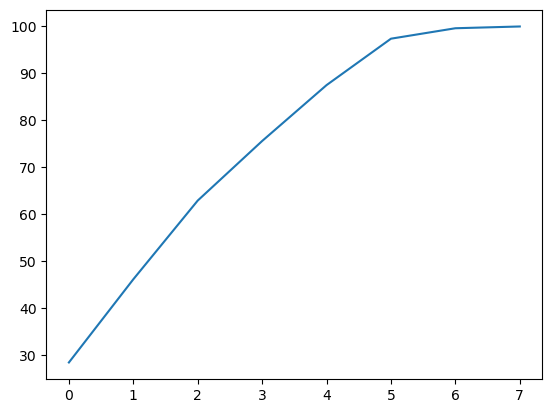

In [45]:
plt.plot(np.cumsum(pca8.explained_variance_ratio_ * 100))

<AxesSubplot:>

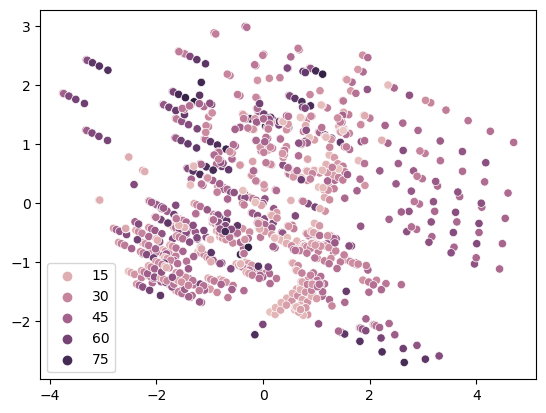

In [46]:
pca2 = PCA(n_components=2)           
pca2.fit(X_scaled)                          
X_pca2 = pca2.transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0],y=X_pca2[:,1],hue=target)

In [47]:
print('components: ' + str(pca2.components_))

components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]]


# Compute Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')


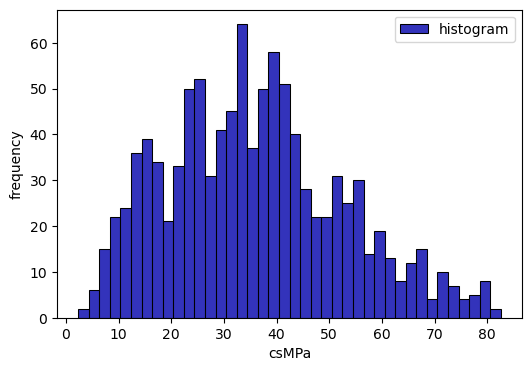

In [2]:
plt.figure(figsize=(6, 4))

sns.histplot(df.csMPa, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('csMPa')

plt.show()

In [3]:
df['goodconcrete']=(df.csMPa>50.0).astype(int)
del df['csMPa']

In [4]:
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,goodconcrete
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,0


0       1
1       1
2       0
3       0
4       0
       ..
1025    0
1026    0
1027    0
1028    0
1029    0
Name: goodconcrete, Length: 1030, dtype: int32

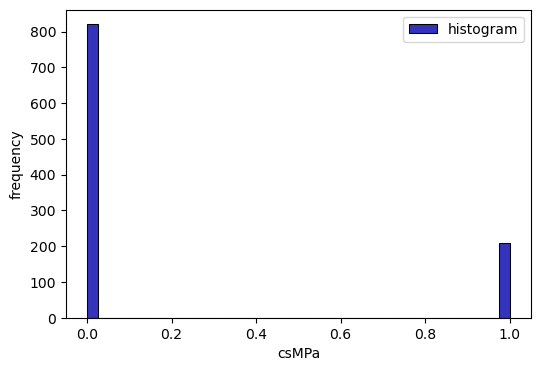

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(df.goodconcrete, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('csMPa')

plt.show()

In [6]:
#Validation
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [7]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [8]:
y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values

In [9]:
del df_train['goodconcrete']
del df_val['goodconcrete']

In [10]:
#Exploratory Data Analysis
global_mean = df_train_full.goodconcrete.mean()
round(global_mean, 3)

0.201

In [11]:
#Data Prep
numerical=['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [12]:
train_dict = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [13]:
#Training Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

val_dict = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [14]:
model.predict(X_val)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
model.predict_proba(X_val)

array([[9.42517772e-01, 5.74822285e-02],
       [9.87828720e-01, 1.21712800e-02],
       [9.91724605e-01, 8.27539495e-03],
       [8.24016265e-01, 1.75983735e-01],
       [9.91050968e-01, 8.94903244e-03],
       [3.64628976e-01, 6.35371024e-01],
       [7.79546072e-01, 2.20453928e-01],
       [9.85742957e-01, 1.42570433e-02],
       [9.99229048e-01, 7.70951984e-04],
       [3.47768574e-01, 6.52231426e-01],
       [8.99356837e-01, 1.00643163e-01],
       [9.89271908e-01, 1.07280920e-02],
       [9.90064700e-01, 9.93530015e-03],
       [6.55576183e-01, 3.44423817e-01],
       [2.58987133e-01, 7.41012867e-01],
       [9.19704123e-01, 8.02958771e-02],
       [1.76319718e-01, 8.23680282e-01],
       [1.67959267e-01, 8.32040733e-01],
       [9.94699706e-01, 5.30029355e-03],
       [9.15495024e-01, 8.45049757e-02],
       [4.08475548e-01, 5.91524452e-01],
       [9.96436830e-01, 3.56316998e-03],
       [8.87835551e-01, 1.12164449e-01],
       [9.85468841e-01, 1.45311591e-02],
       [5.471961

In [16]:
y_pred = model.predict_proba(X_val)[:, 1]

In [17]:
good = y_pred > 0.5

In [18]:
(y_val == good).mean()

0.8308823529411765

In [19]:
accuracy_score(y_val, y_pred>0.5)

0.8308823529411765

In [22]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)


t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[190,  18],
       [ 28,  36]])

In [23]:
len(y_val)

272

In [24]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.7 , 0.07],
       [0.1 , 0.13]])

# Compute Precision and Recall

In [25]:
p = tp / (tp + fp)
p

0.6666666666666666

In [26]:
r = tp / (tp + fn)
r

0.5625

# Implement ROC and AUC in Python

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)


SyntaxError: iterable argument unpacking follows keyword argument unpacking (3639260843.py, line 11)

In [43]:
from sklearn.metrics import roc_auc_score

# Example prediction scores and true labels
import pandas as pd 

y_true = y_val
y_scores = model.predict(X_val)


# Compute ROC AUC score
roc_auc = roc_auc_score(y_true, y_scores)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7379807692307692


In [41]:
y_val

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
y_scores

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

# Build your own dataset from NOMAD

In [66]:
import numpy as np
import pandas as pd
from ase import Atoms
from ase.calculators.emt import EMT

data = []

# loop over 1000 entries
for i in range(1000):
    # generate a random molecule with 3-10 atoms
    n_atoms = np.random.randint(3, 11)
    atoms = Atoms(symbols=['H']*n_atoms, positions=np.random.rand(n_atoms, 3)*10)
    
    # calculate the total energy of the molecule using the EMT calculator
    atoms.set_calculator(EMT())
    energy = atoms.get_potential_energy()
    
    # append the data to the list
    data.append([energy, atoms.get_positions().ravel()])

# convert the list to a Pandas DataFrame
df = pd.DataFrame(data, columns=['energy'] + ['x{}'.format(i) for i in range(n_atoms*3)])
df


ValueError: 25 columns passed, passed data had 2 columns

# Perform SVM on the Binary Classification Dataset


In [68]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#bare bones code: need to edit still

# load the iris dataset from scikit-learn
iris = datasets.load_iris()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# create a support vector machine classifier
clf = svm.SVC(kernel='linear', C=1)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# predict the classes of the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Implement Decision Tree

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Hannah Pichman\Downloads\archive\Concrete_Data_Yeh.csv')

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df.csMPa, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('csMPa')

plt.show()

In [3]:
df['goodconcrete']=(df.csMPa>50.0).astype(int)
del df['csMPa']

In [4]:
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,goodconcrete
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,0


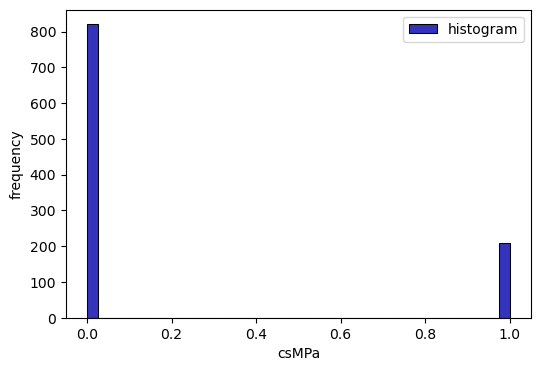

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(df.goodconcrete, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('csMPa')

plt.show()

### Validation

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [8]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [9]:
y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values

In [10]:
del df_train['goodconcrete']
del df_val['goodconcrete']

### Exploratory Data Analysis

In [11]:
global_mean = df_train_full.goodconcrete.mean()
round(global_mean, 3)

0.201

### Data Prep

In [12]:
numerical=['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [13]:
train_dict = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

### Training Decision Tree

In [14]:
from sklearn import tree

In [15]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
val_dict = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [17]:
model.predict(X_val)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
from sklearn.tree import export_text

In [19]:
print(export_text(model))

|--- feature_1 <= 357.50
|   |--- feature_0 <= 42.00
|   |   |--- feature_2 <= 1127.50
|   |   |   |--- feature_1 <= 319.50
|   |   |   |   |--- feature_7 <= 161.30
|   |   |   |   |   |--- feature_5 <= 54.20
|   |   |   |   |   |   |--- feature_1 <= 252.05
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  252.05
|   |   |   |   |   |   |   |--- feature_0 <= 15.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  15.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  54.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  161.30
|   |   |   |   |   |--- feature_1 <= 297.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  297.50
|   |   |   |   |   |   |--- feature_1 <= 297.90
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  297.90
|   |   |   |   |   |   |   |--- feature_5 <= 153.15
|   |   |  

In [20]:
model.predict_proba(X_val)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]

good = y_pred > 0.5

(y_val == good).mean()

0.9044117647058824

In [22]:
accuracy_score(y_val, y_pred>0.5)

0.9044117647058824

In [23]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

len(y_val)

272

In [24]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.72, 0.04],
       [0.05, 0.18]])

### Precision and Recall

In [25]:
p = tp / (tp + fp)
p

0.8064516129032258

In [26]:
r = tp / (tp + fn)
r

0.78125

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val,y_pred)

0.8617788461538461

# Implement a Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [29]:
y_pred = rf.predict_proba(X_val)[:,1]

In [30]:
roc_auc_score(y_val,y_pred)

0.9380634014423077

In [31]:
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

# Implement Gradient Boosting

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
import xgboost as xgb

In [34]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [35]:
xgb_param ={
    'eta':0.3,
    'min_child_weight':1,
    
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'seed':1,
    'verbosity' : 1,
}

In [36]:
model = xgb.train(xgb_param, dtrain, num_boost_round=200)

In [37]:
y_pred = model.predict(dval)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.9757737379807693